Aviation Risk Analysis for Aircrafts

1.0 Back ground
The Company is seeking to diversify its portfolio to new industries by operating airplanes for commercial
and private enterprises. Management aim is to identify the potential risks of aircrafts.

The goal is to identify low-risk aircraft models and manufacturers. Historical aviation accient data from National Transportation Safety Board was analysed to identify lowest risk aircraft and make recommendation.

The key business concerns are:
- What are accident trends overtime?
- Which aircraft models have the fewest and least severe accidents?
- Which manufacturers produce safe aircrafts?

2.0 Data
The data contains aviation accidents and incident records from 1962 to 2023.
Maajor fields are: 
event_date: date of the accident
make: aircraft manufacturer
aircraft_category : type of aircraft (e.g helicopter,airplane)
model: aircraft model
total_fatal_injuries: number of fatalities
engine_type: 
aircraft_damage: level of damage to aircraft


2.1 Load data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("AviationData.csv" , encoding='latin1', dtype={
        6: str,
        7: str,
        28: str
    })

2.2 Data Overview

In [24]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [25]:
# data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [26]:
#to find missing values
df.isnull

<bound method DataFrame.isnull of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  

In [27]:
#summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


3. Data cleaning
The columns that will not be used and missing values are dropped.
The dates are converted to the right format 

3.1. Drop Columns

In [28]:
print(df.columns.tolist())

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [29]:
# defining columns to drop
drop_columns = ["Accident.Number" , "Investigation.Type" , "Report.Status" , "Publication.Date" ]
#drop columns
df.drop( columns = drop_columns)

,Event.Id,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,...,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,...,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,...,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,...,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,...,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,...,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN
88885,20221227106494,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,20221227106497,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,...,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN
88887,20221227106498,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,...,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN


3.2 Dropping missing values

In [30]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)

Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64


In [31]:
# missing values aircraft damage and engine type input unknown
df["Aircraft.damage"] = df ["Aircraft.damage"].fillna("unknown")
df["Engine.Type"] = df ["Engine.Type"].fillna("unknown")

In [32]:
#drop missing values in rows of  make and model columns
df = df.dropna( subset= ["Make" , "Model" ,"Total.Serious.Injuries" ])


In [33]:
# Label accident as fatal or Non-fatal where fatal injuries are more than zero marked as fatal
df.loc[:, "severity"] = np.where (df["Total.Fatal.Injuries"] > 0 , "Fatal" , "Non-Fatal")

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [34]:
# getting the  year of accident
df.loc[:, 'Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df.loc[:, 'Year'] = df['Event.Date'].dt.year


In [35]:
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,severity,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,Fatal,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,Fatal,1962
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,Fatal,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,Fatal,1979
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,Fatal,1981


4. Data Analysis :

The aircraft with  the lowest risk is identified by analysing the accident trends and identifying the safest aircraft and manufacturer. Aircraft with least accidents and non fatal.

4.1 Identify aircraft models and manufacturers with low fatality rate

Safest Manufacturers: Manufacturers with the least number of non fatal  and fatal accidents

In [36]:
# Fatality rate by Make and Model
model_stats = df.groupby(['Make', 'Model'])['severity'].value_counts().unstack()
model_stats['Total'] = model_stats.sum(axis=1)
model_stats['Fatality Rate'] = model_stats.get('Fatal', 0) / model_stats['Total']

# Filter for models with a decent number of records (e.g., >10 incidents)
safe_models = model_stats[model_stats['Total'] > 10].sort_values('Fatality Rate')

# Top 10 safest aircraft models (lowest fatality rate)
safe_models.head(10)


,severity,Fatal,Non-Fatal,Total,Fatality Rate
Make,Model,,,,
Piper,PA18,1.0,54.0,55.0,0.018182
Cessna,152II,1.0,37.0,38.0,0.026316
Rockwell,S2R,1.0,37.0,38.0,0.026316
Enstrom,F-28A,1.0,35.0,36.0,0.027778
Boeing,727-200,1.0,34.0,35.0,0.028571
CESSNA,182A,1.0,32.0,33.0,0.030303
Mcdonnell Douglas,DC-10-10,1.0,32.0,33.0,0.030303
BOEING,747,2.0,63.0,65.0,0.030769
Cessna,180A,1.0,31.0,32.0,0.031250


In [37]:
# Fatality rate by Manufacturer (Make)
make_stats = df.groupby('Make')['severity'].value_counts().unstack()
make_stats['Total'] = make_stats.sum(axis=1)
make_stats['Fatality Rate'] = make_stats.get('Fatal', 0) / make_stats['Total']

# Filter for manufacturers with >20 incidents
safe_makes = make_stats[make_stats['Total'] > 20].sort_values('Fatality Rate')

# Top 10 safest manufacturers
safe_makes.head(10)


severity,Fatal,Non-Fatal,Total,Fatality Rate
Make,,,,
GRUMMAN ACFT ENG COR-SCHWEIZER,1.0,57.0,58.0,0.017241
BOMBARDIER INC,2.0,66.0,68.0,0.029412
STINSON,3.0,88.0,91.0,0.032967
BOEING,40.0,1105.0,1145.0,0.034934
Raven,3.0,81.0,84.0,0.035714
Callair,1.0,25.0,26.0,0.038462
BOMBARDIER,2.0,45.0,47.0,0.042553
AIRBUS INDUSTRIE,1.0,21.0,22.0,0.045455
Thunder And Colt,1.0,20.0,21.0,0.047619


5.0 Data Visualisation:


5.1 Accident trend over time

<Figure size 1080x576 with 0 Axes>

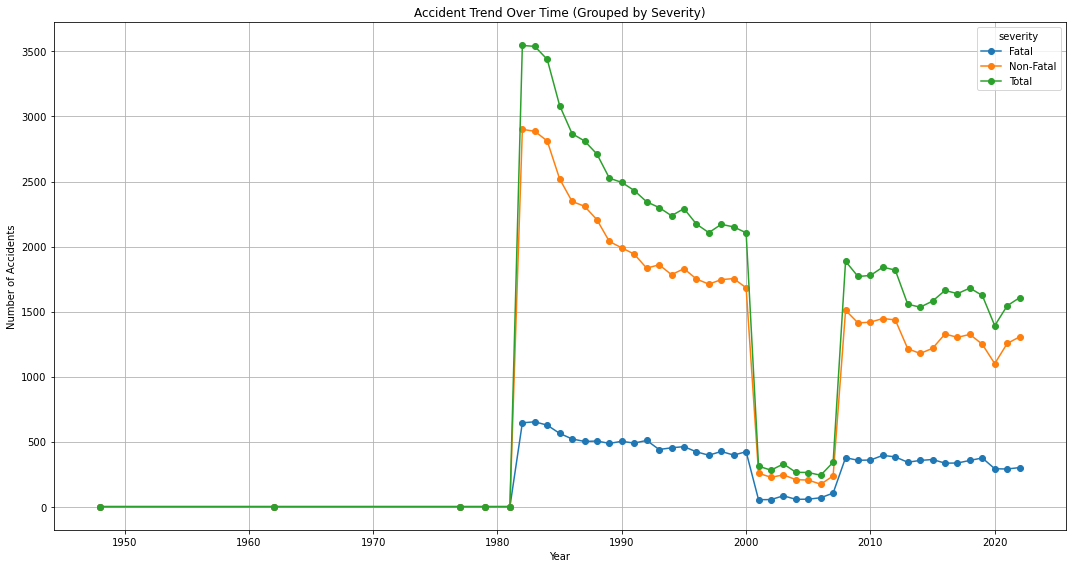

In [38]:
#To show the accident trend over time grouped by Fatal, Non-Fatal, and Total accidents


# Group data by Year and severity, then count the number of accidents
accident_trend_grouped = df.groupby(['Year', 'severity']).size().reset_index(name='Accident_Count')

# Pivot the data to have Fatal and Non-Fatal as columns
accident_trend_pivot = accident_trend_grouped.pivot(index='Year', columns='severity', values='Accident_Count').fillna(0)

# Add a Total column for total accidents
accident_trend_pivot['Total'] = accident_trend_pivot.sum(axis=1)

# Plot the trend
plt.figure(figsize=(15, 8))
accident_trend_pivot.plot(kind='line', marker='o', figsize=(15, 8))
plt.title('Accident Trend Over Time (Grouped by Severity)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

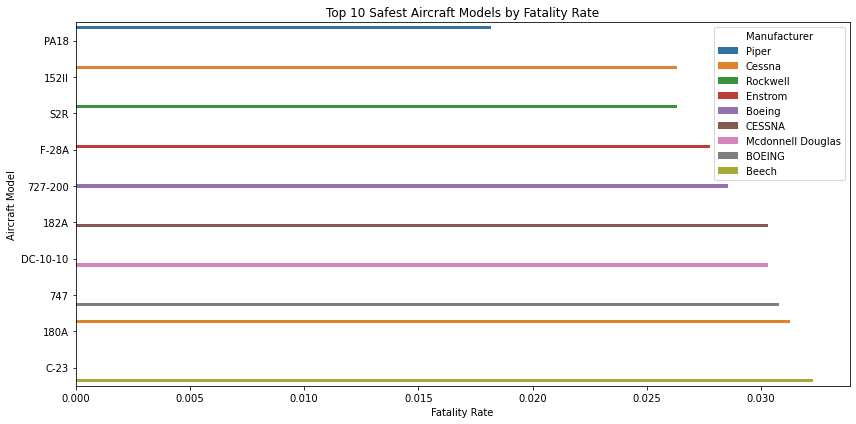

In [39]:
# To show the safest aircraft models by fatality rate

# Group by Make and Model, calculate fatality rate
model_stats = df.groupby(['Make', 'Model'])['severity'].value_counts().unstack()
model_stats['Total'] = model_stats.sum(axis=1)
model_stats['Fatality Rate'] = model_stats.get('Fatal', 0) / model_stats['Total']

# Filter for models with enough data
safe_models = model_stats[model_stats['Total'] > 10].sort_values('Fatality Rate').head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=safe_models.reset_index(), x='Fatality Rate', y='Model', hue='Make')
plt.title('Top 10 Safest Aircraft Models by Fatality Rate')
plt.xlabel('Fatality Rate')
plt.ylabel('Aircraft Model')
plt.legend(title='Manufacturer')
plt.tight_layout()
plt.show()


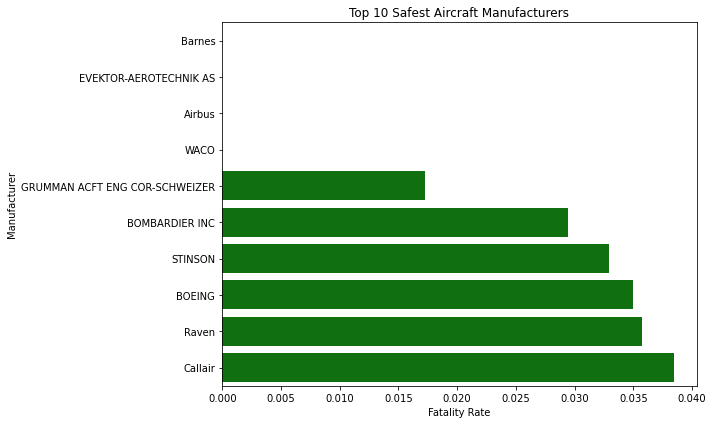

In [40]:
# Group by Manufacturer (Make), calculate fatality rate
make_stats = df.groupby('Make')['severity'].value_counts().unstack().fillna(0)
make_stats['Total'] = make_stats.sum(axis=1)
make_stats['Fatality Rate'] = make_stats.get('Fatal', 0) / make_stats['Total']

# Filter for manufacturers with sufficient data
safe_makes = make_stats[make_stats['Total'] > 20].sort_values('Fatality Rate').head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=safe_makes.reset_index(), x='Fatality Rate', y='Make', color='green')
plt.title('Top 10 Safest Aircraft Manufacturers')
plt.xlabel('Fatality Rate')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()


6.0 Business Recommendation
1. The business should focus on purchasing aircrafts/models with lowest fatality rate.
2. Priority be given to manufacturers who have a low fatality rate and compared to the number of accidents.
3. When making the decision the business should consider accident trend over time, consider manufacturers where accidents are reducing over time.
 
 Limitations:
 The analysis did consider the weather at the time of accident however it is not expected that it will affect the outcome significantly.
 The number of accidents may affected by number of planes in use for the particular manufacturer (the popular manufacturers/aircrafts have high number of aircrafts in use hence a higher number of accidents); To take care of this the fatality rate is used.